In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = sns.load_dataset("tips")
print("Dataset Loaded. Shape:", df.shape)
display(df.head())


Dataset Loaded. Shape: (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Descriptive Statistics
print("Descriptive Statistics")
print()
numeric_cols = ["total_bill", "tip", "size"]
for col in numeric_cols:
    print(f"{col}: Mean={df[col].mean():.2f}, Median={df[col].median():.2f}, Var={df[col].var():.2f}, Std={df[col].std():.2f}")
print()

# Confidence Interval for Mean (Example: total_bill)
mean = df["total_bill"].mean()
std_err = stats.sem(df["total_bill"])
ci = stats.t.interval(0.95, len(df["total_bill"]) - 1, loc=mean, scale=std_err)
print(f"95% CI for total_bill mean: {ci}")
print()

# 4. Hypothesis Testing (t-test)
male_bills = df[df["sex"] == "Male"]["total_bill"]
female_bills = df[df["sex"] == "Female"]["total_bill"]

t_stat, p_val = stats.ttest_ind(male_bills, female_bills, equal_var=False)
print(f"T-test Male vs Female bills: t-stat={t_stat:.3f}, p-value={p_val:.4f}")
print()
alpha = 0.05
print("Reject H0" if p_val < alpha else "Fail to reject H0")
print()

# Correlation & Covariance
corr_matrix = df[numeric_cols].corr()
cov_matrix = df[numeric_cols].cov()
print("Correlation Matrix:\n", corr_matrix)
print()
print("Covariance Matrix:\n", cov_matrix)
print()

# Outlier Detection (IQR)
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))
print("Outliers per column:\n", outliers.sum())

Descriptive Statistics

total_bill: Mean=19.79, Median=17.80, Var=79.25, Std=8.90
tip: Mean=3.00, Median=2.90, Var=1.91, Std=1.38
size: Mean=2.57, Median=2.00, Var=0.90, Std=0.95

95% CI for total_bill mean: (np.float64(18.663331704358473), np.float64(20.908553541543167))

T-test Male vs Female bills: t-stat=2.373, p-value=0.0186

Reject H0

Correlation Matrix:
             total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

Covariance Matrix:
             total_bill       tip      size
total_bill   79.252939  8.323502  5.065983
tip           8.323502  1.914455  0.643906
size          5.065983  0.643906  0.904591

Outliers per column:
 total_bill    9
tip           9
size          9
dtype: int64


## Visualization

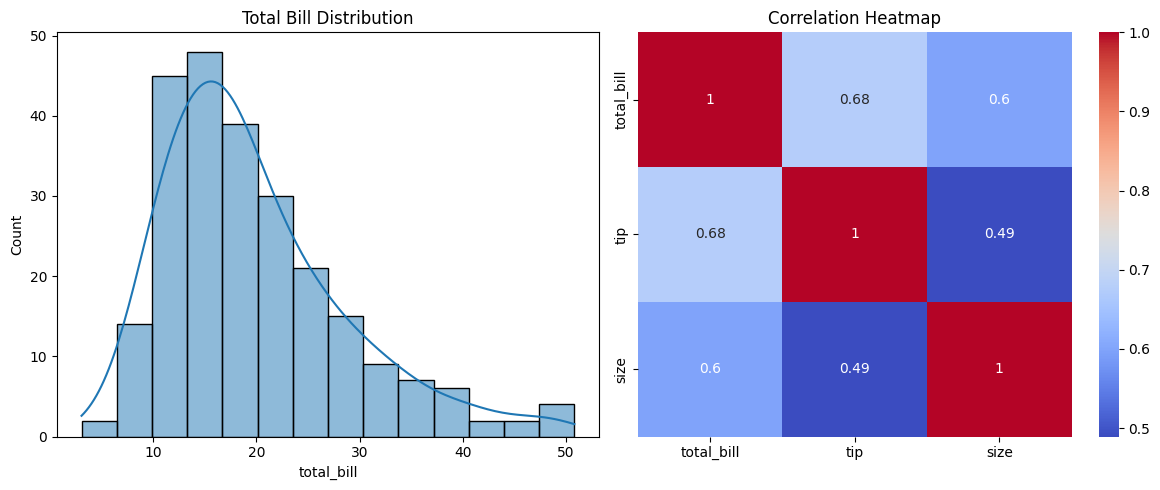

In [4]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df["total_bill"], kde=True)
plt.title("Total Bill Distribution")

plt.subplot(1,2,2)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()
